In [1]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 1.9MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=89e34d67e95b02a459cb7bd5515e993b23af4dd6860b1155ebbd14e1ad277b9c
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/Classification_Bankruptcy/5조 

/content/gdrive/My Drive/Colab Notebooks/Classification_Bankruptcy/5조


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('imputed_final.csv')
print(df.shape)

(6835, 50)


In [6]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(6835, 49) (6835,)


# 1. Scailing for Factor Analysis

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Draw Scree Plot using PCA

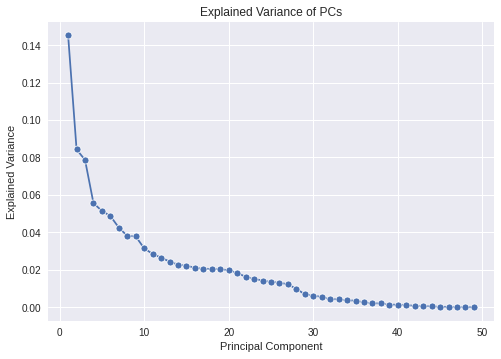

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
plt.style.use('seaborn')
lambdas = pca.explained_variance_ratio_
sns.lineplot(x = range(1, X_scaled.shape[1]+1),y  = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCs')
plt.grid(True)
plt.show()

In [0]:
lambdas_cumsum = np.cumsum(lambdas) 

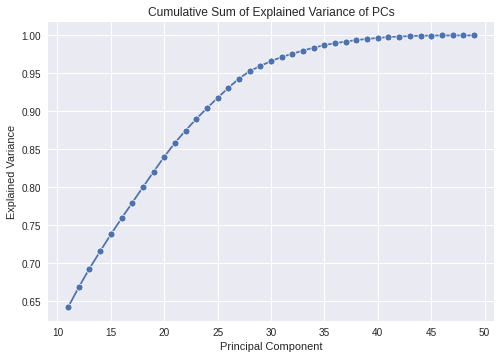

In [10]:
sns.lineplot(x = range(11, X_scaled.shape[1]+1),y  = lambdas_cumsum[10:], marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Cumulative Sum of Explained Variance of PCs')
plt.grid(True)
plt.show()

30개 정도의 PC만 사용해도 충분하다!

# 3. Draw Scree Plot using FA

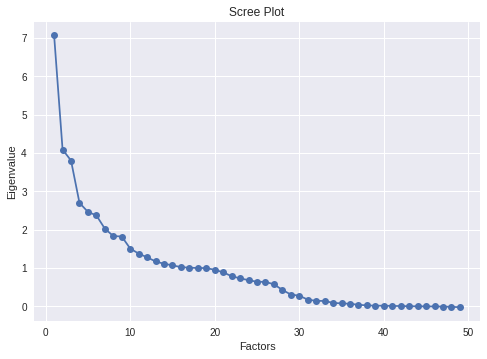

In [11]:
fa = FactorAnalyzer(n_factors = 30, rotation = 'varimax', bounds = (0, 1), method = 'principal')
fa.fit(X_scaled)
ev, v = fa.get_eigenvalues()
plt.plot(range(1,X.shape[1]+1),v, 'o-') # factor eigen values
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.style.use('seaborn')

10개 정도의 factor로 데이터를 설명할 수 있을 것 같다

# 4. Factor Analysis

In [0]:
fa_df = pd.DataFrame(np.round(fa.loadings_.T, 10), columns = X.columns)
index = ['Loading'+str(i) for i in range(1, fa_df.shape[0]+1)]
fa_df.index = index

In [20]:
fa_df.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr16,Attr18,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr29,Attr30,Attr32,Attr33,Attr35,Attr36,Attr38,Attr39,Attr40,Attr43,Attr45,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr56,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
Loading1,0.981231,-0.143128,0.179838,-0.006906,0.002497,0.009540,0.987477,0.001711,0.018206,0.135194,0.979726,0.024828,-0.048244,0.987145,0.022848,0.332310,0.003088,0.767867,0.028882,0.045336,0.123628,0.025878,0.034778,0.047737,0.008326,-0.007329,0.022066,0.581830,0.080186,0.092133,0.084336,0.002620,0.000936,0.022331,0.004094,0.572247,0.149771,0.005124,-0.181853,-0.006966,0.025659,0.012436,-0.002310,-0.023646,-0.000716,0.000606,-0.001231,0.002710,0.021950
Loading2,0.120632,-0.963558,0.491812,0.043499,0.011923,0.181020,0.119176,0.011241,-0.042155,0.971552,0.099767,0.010989,0.041121,0.119111,0.003092,0.036527,0.002161,0.106021,0.008471,-0.126907,0.925519,0.003104,0.004915,0.138745,-0.161449,-0.030985,0.013869,0.138742,-0.046079,0.901743,-0.002415,0.023084,-0.110934,0.011200,0.003771,0.085928,-0.003683,0.013159,-0.552493,-0.026473,0.026844,0.008345,0.015411,-0.046063,-0.003664,0.003165,0.003714,0.004805,-0.014139
Loading3,0.000459,-0.008214,0.003634,0.025764,0.001908,-0.000327,0.002330,0.947420,-0.002331,0.007097,0.052495,0.141526,0.000681,0.002328,0.991172,0.000620,-0.002061,0.037891,0.008326,0.000160,0.001528,0.989763,0.000880,-0.026370,0.000933,-0.002133,0.954688,-0.012494,-0.002881,0.013772,0.004089,0.414969,-0.000167,0.000611,-0.001152,0.026238,0.010731,0.011671,-0.022371,-0.002291,0.000957,0.000120,-0.000768,0.000062,-0.000909,0.000555,0.003131,-0.001947,0.000099
Loading4,0.009417,-0.009003,0.036059,-0.002065,0.000214,-0.000875,0.014061,-0.001270,0.005343,0.008053,0.015575,-0.000782,0.011713,0.014160,-0.000719,0.019708,-0.000609,0.005654,-0.000877,0.000395,0.001722,-0.000847,0.011253,-0.034680,0.003295,-0.000984,0.004054,0.008942,0.009092,0.007497,0.000352,0.001217,-0.001677,-0.000543,-0.000854,0.005833,-0.001398,-0.000646,-0.011835,-0.001063,0.945609,0.955084,0.001128,0.001616,-0.000111,0.001149,-0.000555,-0.000351,0.805329
Loading5,0.003944,0.009190,-0.026481,-0.001061,-0.022784,-0.002358,-0.002543,0.001351,-0.005804,-0.006345,-0.000407,-0.000587,0.001770,-0.002594,0.001244,-0.008407,-0.001296,-0.002123,0.060061,-0.002717,-0.028901,0.001259,-0.001298,0.013955,-0.038337,0.971194,-0.008525,-0.014341,-0.015487,-0.009127,-0.006864,-0.002021,0.215000,0.307050,0.567256,-0.041035,-0.008232,-0.001423,0.035893,0.971530,-0.003127,0.001377,0.002794,0.021568,-0.000739,-0.020270,-0.000444,-0.000103,-0.000598
Loading6,0.013319,-0.012121,0.028018,-0.003228,0.000553,0.962392,0.015893,0.000814,0.000704,0.009440,0.013622,0.000838,0.001314,0.015887,0.001060,0.005196,-0.002080,0.006048,0.000584,0.968996,0.034387,0.001042,0.000192,-0.012447,-0.006236,-0.002716,-0.002896,0.011715,0.002022,-0.012381,0.001559,-0.001053,-0.005964,0.000538,-0.000754,0.003536,0.003140,-0.001003,-0.037440,-0.002415,-0.000190,0.000353,0.000432,-0.003356,-0.000451,-0.000168,-0.000309,0.000483,-0.001110
Loading7,0.011397,-0.002323,0.005374,0.001977,0.001152,0.001038,0.011606,0.001034,0.003328,0.002311,0.010854,0.000078,-0.203288,0.012162,0.001288,0.084694,0.000336,0.009258,-0.022422,0.000521,0.013384,0.001571,-0.000074,-0.002895,-0.247319,-0.000581,-0.001908,0.053819,0.000553,0.002961,0.850877,0.002913,0.003418,0.000130,0.000408,0.001126,0.164727,-0.000159,0.012195,-0.000572,0.005119,-0.002924,0.984477,-0.013286,-0.002087,-0.000447,0.000268,-0.000760,-0.002334
Loading8,0.052449,-0.022936,0.022796,-0.003155,0.001066,0.002756,0.052165,0.000631,0.000794,0.019421,0.048747,0.005275,0.960237,0.058463,0.001579,0.927992,-0.000174,0.029367,0.002915,0.002909,0.016583,0.001824,0.001638,-0.029471,-0.037953,-0.003714,-0.002403,0.035800,-0.007379,0.012434,-0.054171,-0.000152,-0.044983,0.003978,-0.000327,0.031895,0.012874,-0.000673,-0.041271,-0.001688,0.0

In [0]:
columns = ['net profit / total assets',
'total liabilities / total assets',
'working capital / total assets',
'current assets / short-term liabilities',
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
'retained earnings / total assets',
'EBIT / total assets',
'book value of equity / total liabilities',
'sales / total assets',
'equity / total assets',
'(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities',
'(gross profit + depreciation) / sales',
'(gross profit + interest) / total assets',
'(total liabilities * 365) / (gross profit + depreciation)',
'(gross profit + depreciation) / total liabilities',
'total assets / total liabilities',
'gross profit / total assets',
'gross profit / sales',
'(inventory * 365) / sales',
'sales (n) / sales (n-1)',
'profit on operating activities / total assets',
'net profit / sales',
'gross profit (in 3 years) / total assets',
'(equity - share capital) / total assets',
'(net profit + depreciation) / total liabilities',
'profit on operating activities / financial expenses',
'working capital / fixed assets',
'logarithm of total assets',
'(total liabilities - cash) / sales',
'(gross profit + interest) / sales',
'(current liabilities * 365) / cost of products sold',
'operating expenses / short-term liabilities',
'operating expenses / total liabilities',
'profit on sales / total assets',
'total sales / total assets',
'(current assets - inventories) / long-term liabilities',
'constant capital / total assets',
'profit on sales / sales',
'X40 (current assets - inventory - receivables) / short-term liabilities',
'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
'profit on operating activities / sales',
'rotation receivables + inventory turnover in days',
'(receivables * 365) / sales',
'net profit / inventory',
'(current assets - inventory) / short-term liabilities',
'(inventory * 365) / cost of products sold',
'EBITDA (profit on operating activities - depreciation) / total assets',
'EBITDA (profit on operating activities - depreciation) / sales',
'X50 current assets / total liabilities',
'short-term liabilities / total assets',
'(short-term liabilities * 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'working capital',
'(sales - cost of products sold) / sales',
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
'total costs /total sales',
'long-term liabilities / equity',
'sales / inventory',
'sales / receivables',
'(short-term liabilities *365) / sales',
'sales / short-term liabilities',
'sales / fixed assets',
'class'    
]

In [0]:
real_columns = []
trash = {15,17,19,20,28,31,34,37,41,42,44,46,55,57,62}

for idx, col in enumerate(columns):
  if idx+1 in trash:
    continue
  else:
    real_columns.append(col)

In [23]:
for i in range(1, 11):
  tmp = fa_df.iloc[i, :]
  top3 = list(np.argsort(-tmp.values)[:3].reshape(3,))
  bottom3 = list(np.argsort(tmp.values)[:3].reshape(3))
  print("Factor"+str(i))
  print(f"Top3 is {real_columns[top3[0]]}, {real_columns[top3[1]]}, {real_columns[top3[2]]}")
  print(f"Bottom3 is {real_columns[bottom3[0]]}, {real_columns[bottom3[1]]}, {real_columns[bottom3[2]]}")
  print("=" * 50)

Factor1
Top3 is equity / total assets, (equity - share capital) / total assets, constant capital / total assets
Bottom3 is total liabilities / total assets, short-term liabilities / total assets, (total liabilities - cash) / sales
Factor2
Top3 is (gross profit + depreciation) / total liabilities, (net profit + depreciation) / total liabilities, operating expenses / short-term liabilities
Bottom3 is logarithm of total assets, short-term liabilities / total assets, profit on sales / total assets
Factor3
Top3 is constant capital / fixed assets, equity / fixed assets, sales / fixed assets
Bottom3 is logarithm of total assets, short-term liabilities / total assets, total liabilities / total assets
Factor4
Top3 is (short-term liabilities * 365) / cost of products sold), (current liabilities * 365) / cost of products sold, (inventory * 365) / cost of products sold
Bottom3 is EBITDA (profit on operating activities - depreciation) / total assets, (total liabilities - cash) / sales, (equity - sh

모두 재정 건전성(?)과 관계가 있는 것 같음 - sales, profit, equity, short-term liabilities 관련 변수들이 많이 반영됨

In [24]:
fa_df_top2 = pd.DataFrame(fa.fit_transform(X_scaled)[:, :2], columns=['Factor1', 'Factor2'])
fa_df_top2['class'] = y.astype(np.int)
fa_df_top2.head()

,Factor1,Factor2,class
0,-0.366158,0.356621,0
1,2.729368,-0.157320,0
2,-2.053705,0.416218,0
3,0.256449,0.322400,0
4,0.794249,0.090685,0


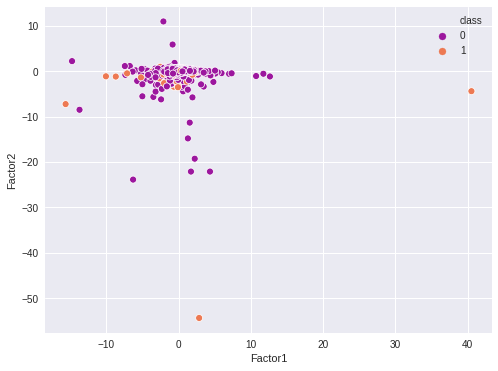

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Factor1', y='Factor2', data=fa_df_top2, hue='class', palette='plasma');

부도가 난 회사들은 대부분 Factor1의 - 부분과, Factor2의 0 부분에 위치하는 것으로 보아 재정건전성이 부족해 보인다 <br>
그 다음으로, 어떤 변수들의 정보량이 Factor에 많이 반영되었는지 알아보자.

In [26]:
top10 = np.argsort(-fa.get_communalities())[:10]

for t in top10:
  print(real_columns[t])

sales (n) / sales (n-1)
profit on operating activities / financial expenses
long-term liabilities / equity
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
sales / receivables
net profit / sales
total costs /total sales
EBITDA (profit on operating activities - depreciation) / sales
(sales - cost of products sold) / sales
sales / total assets


Liabilites, Profit, Sales 관련된 변수들이 많이 반영되었음을 알 수 있다